The aim of the below is to illustrate some simple uses of data analysis using Pandas. This includes some basic exploration as well as using scikit to cluster the data and create a basic linear regression model in an attempt to predict the average rating of a boardgame.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv('/Users/harryrobinson/Desktop/for coding/games.csv')

# print out (rows,columns) and the first 5 rows of the data set
print(games.shape)
games.head(5)

(81312, 20)


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [2]:
# show how pandas has stored each column of the data i.e. string, int, float etc
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

As can be seen above, not all columns have the same number of rows. As such, this must mean there are some columns with missing data. 

I'm going to change the 'users_rated' value to NaN if both columns 'average_rating' and 'users_rated' equal zero. This is because I wish to show the use of the library 'missingno'(and since there aren't many NaN values to start with it wouldn't show much). 

I'll then drop these values along with the original NaN values. Firstly, the rows with 0 users rated will result in skewing the linear regression model later on since it will effectively act like noise.

In [3]:
# change 'users_rated' to NaN if both 'users_rated' and 'average_rating' = 0, as noted above
import numpy as np
games.ix[(games['users_rated'] == 0) & (games['average_rating'] == 0), 'users_rated'] = np.nan

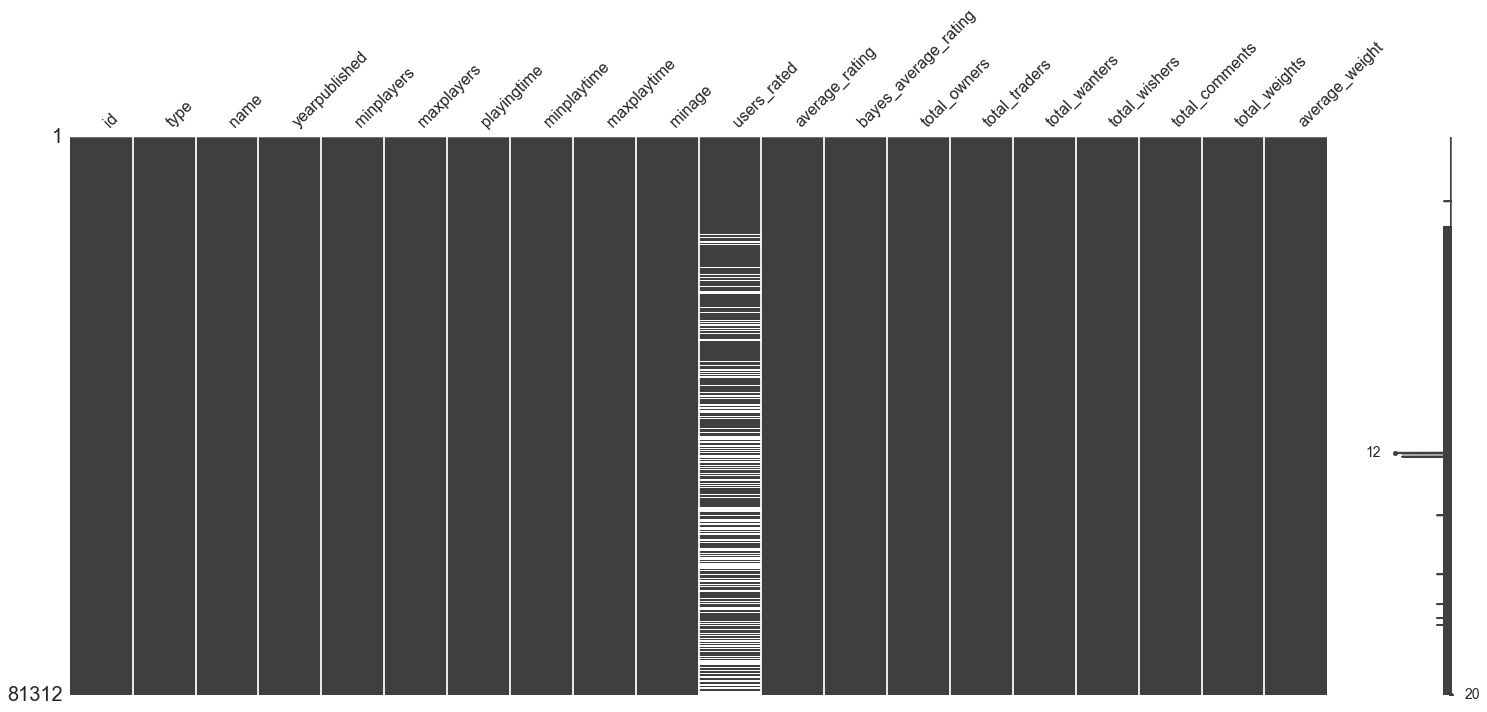

In [4]:
# import missingno, a library to visualise missing data or any patterns in data completion
import missingno as msno
%matplotlib inline
msno.matrix(games)

As can be seen above - the x axis displays the various columns in the data set and the y axis displays all the rows (in a compressed way). The grey and white indictates the degree of the missing values and the 'sparkline' on the right summarizes the general shape of the data completeness. As can be seen, it points out '12' as an indicator and shows a sharp bar corresponding to the 11th column - this is no surpise since column 11 is 'users_rated' and I changed just over 24000 values to NaN in this column.

In [5]:
# drop all rows with NaN values then display the shape of the cut down dataframe
games = games.dropna()
print(games.shape)

(56894, 20)


In [6]:
# use pandas describe method to provide some quick info
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000,56894.000000
mean,64092.223943,1874.793089,2.004834,5.572837,59.921503,57.457184,59.921503,7.591556,231.360477,6.016113,1.654372,374.507470,13.166432,18.002689,60.579024,70.344219,23.548722,1.269716
std,57513.253779,486.032042,0.791475,50.773395,406.451917,393.197450,406.451917,4.869533,1364.124459,1.578830,2.646445,1787.003768,46.984706,71.984315,284.161400,338.375579,138.053005,1.213841
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16133.250000,1989.000000,2.000000,2.000000,15.000000,15.000000,15.000000,4.000000,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,36921.000000,2005.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,7.000000,6.150000,0.000000,20.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
75%,118558.750000,2011.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,39.000000,7.040000,5.488240,125.000000,6.000000,6.000000,15.000000,19.000000,5.000000,2.000000
max,184260.000000,2017.000000,40.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


Above I've used pandas describe method to calcuate some basic statistics such as the mean value, standard deviation and min/max values of the columns in the data set. This gives one a feel for the data distribution and provides some useful information.

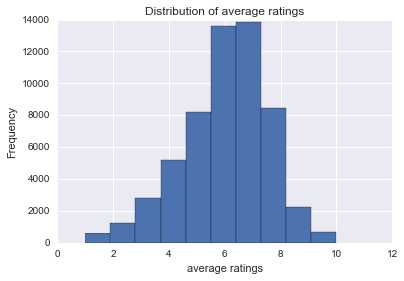

In [7]:
# Visualise the distribution of average ratings since this is what we'll be predicting later on
# This could be done for each of the columns to visually see how the data is distributed
ax = games['average_rating'].plot.hist(title='Distribution of average ratings', x ='average ratings')
ax.set_xlabel('average ratings')

The average ratings approximately follows a normal distribution with a slight negative skew. Since the data is contineous and essentially normally distributed I'll be using the RMSE as the error metric for the linear regression model - as such, I'll be giving more weight to points further away from the mean.

However, before I attempt to use prediction I'll use K-means clustering attempt to see if there are obvious 'groups' in the boardgames. Although I won't build on this now, it may be interesting at a later date to see what factors cause games to cluster.

In [8]:
# Clustering the data to possibly group
from sklearn.cluster import KMeans

# initialise kmeans
kmeans = KMeans(n_clusters = 5, random_state=1)

# k means works only on numeric columns, hence select only numeric columns
numeric_columns = games.select_dtypes(include=[np.number])
numeric_columns = list(numeric_columns.columns)

# take difference to see which columns were removed
print(games.columns.difference(numeric_columns))

# fit the clusters with the numeric data above and extract the labels
kmeans.fit(games[numeric_columns])
labels = kmeans.labels_

Index(['name', 'type'], dtype='object')


In [9]:
#verify the number of clusters and how many data points belong to each cluster
unique, counts = np.unique(labels, return_counts=True)
print(unique,counts)

[0 1 2 3 4] [ 9080 14739  6905  7863 18307]


Below I'm using sklearn and importing the Principal component analysis module. This essentially takes multiple columns and compresses them into two columns (in the case of 2d) while trying to preserve the unique information in each column. This provides a good way to plot n dimensional data on a 2d plot - since in practice anything above 3 dimensions is very hard to visualise. 

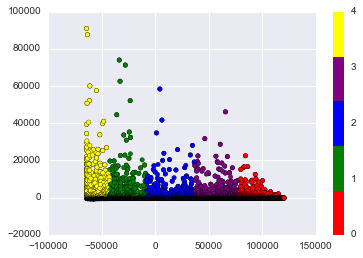

In [36]:
from sklearn.decomposition import PCA
import matplotlib

# colours used for each cluster
colors = ["red","green","blue","purple","yellow"]

# Create a PCA model
pca_2 = PCA(2)

# Fit the PCA model on the numeric columns from earlier
plot_columns = pca_2.fit_transform(games[numeric_columns])

# Make a scatter plot of each game, shaded according to cluster assignment
ax = plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))

#define colourbar and the clusters each data point corresponds to
plt.colorbar(ticks =[0,1,2,3,4])

# Show the plot
plt.show()

As can be seen above, there are 5 distinct groups within the games. Further analysis can be carried out later as to why specific games belong to a given cluster. This technique is also very useful for 'divide and conquer'. An unsupervised learning algorithm search as K-means can be run to segement the data into groups then individual supervised learning methods can be applied to the specific groups, for example.

In [11]:
# Generate all correlations between each variable - this is a measure of the linear correlation between two variables.
correlations = games[numeric_columns].corr()
# Display only the correlations wrt 'average_rating'
correlations["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

As can be seen from the above, some of the columns have virtually no correlation with the 'average_rating'. Ordinarily one wouldn't select these columns as predictors since these columns will offer no benefit (predictive power) when training the algorithm. However, below I'll simply remove 'average_rating' and 'bayes_average_rating' since keeping these columns in the data will lead to overfitting'.

In [19]:
# remove the two columns that will cause overfitting and store in predictors
predictors = [c for c in numeric_columns if c not in ['average_rating', 'bayes_average_rating']]

# print the number of headers in predictors
print(len(predictors))

16


I'll now setup cross validation so I can see how well the model generalises to data the algorithm hasn't seen before.

A training set - which we use to train the classifer.

A test set - which we use to evaluate the classifier's effectiveness.

In [14]:
# Set a random seed to make the shuffle deterministic.
np.random.seed(1)

# Randomly shuffle the rows in the dataframe
games_for_regression = games[numeric_columns].loc[np.random.permutation(games[predictors].index)]

# Select 80% of the dataset to be training data
highest_train_row = int(games_for_regression.shape[0] * .8)
train = games_for_regression.iloc[:highest_train_row,:]

# Select 20% of the dataset to be test data
test = games_for_regression.iloc[highest_train_row:,:]

# Store the variable I'll be predicting
target = 'average_rating'

# Print the shapes of each set
print(train.shape)
print(test.shape)

(45515, 18)
(11379, 18)


Below I first train the dataset with the training set containing 80% of the data. I then use this model with the test data set, the remaining 20% data that was not used in training the algorithm. Finally, I calculate the root mean squared error - this is the mean of the squared error between the predicted response and the actual response. It is then square rooted which 'squashes' the data and makes it the same unit as the response value. In summary, this provides the average error for each prediction.

In [44]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(train[predictors], train[target])

# print the coefficients corresponding to each  feature
list(zip(predictors, reg_model.coef_))

[('id', 9.0192888476123592e-06),
 ('yearpublished', 0.00015335576742238485),
 ('minplayers', -0.035298766408350647),
 ('maxplayers', -0.00019231344270052809),
 ('playingtime', 2.3014291689648537e-05),
 ('minplaytime', 4.9486588466388005e-05),
 ('maxplaytime', 2.3014291689924358e-05),
 ('minage', 0.022198889074271918),
 ('users_rated', -0.00047054869712382876),
 ('total_owners', 0.00023779233532808931),
 ('total_traders', -0.0018195437768683293),
 ('total_wanters', 0.0053902136335611866),
 ('total_wishers', -0.0012419045558468619),
 ('total_comments', 0.0010903194376860284),
 ('total_weights', 0.00053706382000638262),
 ('average_weight', 0.40382528485858415)]

In [38]:
# Import the scikit-learn function to compute error
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set
predictions = reg_model.predict(test[predictors])

# Compute error between our test predictions and the actual values
MSE = mean_squared_error(predictions, test[target])

#square root the MSE
RMSE = np.sqrt(MSE)
print(RMSE)

1.3505288558


The error rate is close to the standard deviation of all board game ratings. This indicates that our model may not have high predictive power. As can be seen from some of the coefficients above, clearly some of the features don't possess a strong (if at all) linear relationship with the response variable and this is why a linear regression model can be limiited; it can only make good predictions if there is a linear relationship between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Further areas that could be explored could be applying decision trees or neural networks in order to find nonlinearities that may exist in the data. Feature extraction could also be applied, for example, generating new, more relevant features from the pre-existing columns (PCA can also be used here to help with this).